## Spark Funds Investment Assignment

### Featuring

This assignment is to analyse the investment strategies for the Spark Funds LLP company. The Target conclusions are to understand and finalize the investment based on the below strategy:

1. Investment must be between 5 to 15 million USD.
2. INvestment based countries must be English speaking countries, to have the easy marketing strategy.
3. Investment on sectors and companies where other investors are also invested.


<hr style="border:2px solid blue"> </hr>

### Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import chardet
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

### Importing Dataset

Importing required datasets Companies.csv, Rounds2.csv and Mapping.csv

#### Importing Companies Dataset

## Checking the Encoding format of file

In [2]:
with open("/Users/nagendraavadanam/Downloads/companies.csv", "rb") as rawdata:
    result=chardet.detect(rawdata.read())
print(result)

{'encoding': 'Windows-1254', 'confidence': 0.4610845903762258, 'language': 'Turkish'}


## Windows-1254 Encoding From Wikipedia

Windows-1254 is a code page used under Microsoft Windows to write Turkish. Characters with codepoints A0 through FF are compatible with ISO 8859-9, but the CR range, which is reserved for C1 control codes in ISO 8859, is instead used for additional characters **(analogous to the relationship between ISO-8859-1 and Windows-1252)**.

**To import the file in a Encoding format given above, file encoding is translated to ISO-8859-1**

In [3]:
companies=pd.read_csv(r"/Users/nagendraavadanam/Downloads/companies.csv", encoding="ISO-8859-1")

In [4]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


#### Importing rounds2 Dataset

In [5]:
with open("/Users/nagendraavadanam/Downloads/rounds2.csv", "rb") as rawdata:
    result=chardet.detect(rawdata.read())
print(result)

{'encoding': 'Windows-1254', 'confidence': 0.4186155476629225, 'language': 'Turkish'}


In [6]:
rounds2=pd.read_csv(r"/Users/nagendraavadanam/Downloads/rounds2.csv", encoding="ISO-8859-1")

In [7]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


#### Importing Mapping Dataset

In [8]:
with open("/Users/nagendraavadanam/Downloads/mapping.csv", "rb") as rawdata:
    result=chardet.detect(rawdata.read())
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [9]:
mapping=pd.read_csv(r"/Users/nagendraavadanam/Downloads/mapping.csv")

In [10]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


<hr style="border:2px solid blue"> </hr>

## Checkpoints - Part 1 : Started


#### Checkpoint 1: Data Cleaning 1

1. Load the companies and rounds data (provided on the previous page) into two data frames and name them companies and rounds2 respectively.
2. Table 1.1: The table below is just for reference — you need to fill out the spreadsheet which is attached in the download section. This holds true for all the tables.

Results Expected: Table 1.1

#### Table 1.1: Understand the dataset
                              
|Scenario  |  Solution  |   
|:--|----------------|
|How many unique companies are present in rounds2? |  
|How many unique companies are present in companies?   |   
|In the companies data frame, which column can be  used as <br> the unique key for each company? Write the name of the column.   |   
|Are there any companies in the rounds2 file which are not <br> present in companies? Answer yes or no: Y/N   |   
|Merge the two data frames so that all variables (columns) <br> in the companies frame are added to the rounds2 data frame. <br> Name the merged frame master_frame.<br> How many observations are present in master_frame?   | 

## Scenario 1

### How many unique companies are present in rounds2?

In [11]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [12]:
## Unique company_permalink in rounds2

rounds2['company_permalink']=rounds2['company_permalink'].str.lower().str.encode('utf-8').str.decode('ascii', 'ignore') ## converting to lower case

print(rounds2['company_permalink'].nunique())

print(f"There are {rounds2['company_permalink'].nunique()} unique rows in rounds2 table for company_permalink attribute")

66368
There are 66368 unique rows in rounds2 table for company_permalink attribute


## Scenario 2

### How many unique companies are present in companies?

In [13]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [14]:
## Unique permalink in companies

companies['permalink']=companies['permalink'].str.lower().str.encode('utf-8').str.decode('ascii', 'ignore') ## converting to lower case

print(companies['permalink'].nunique())

print(f"There are {companies['permalink'].nunique()} unique rows in companies table for permalink attribute")

66368
There are 66368 unique rows in companies table for permalink attribute


## Scenario 3

### In the companies data frame, which column can be used as the unique key for each company? Write the name of the column?

In [15]:
companies.info()

## From companies info, we got to understand that there are no null values in permalink attribute and addition to that its unique in nature. So in this case permalink is the unique key for each company.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


## Scenario 4

### Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N

In [16]:
company_permalink=companies['permalink']

In [17]:
rounds2_permalink=rounds2['company_permalink'].unique()

#### Tested the company_permalink in rounds2 are not present in companies (permalink attribute) using Intersection <br> where result is exact the same count of companies present in both dataframes

In [18]:
pd.Series(list(set(rounds2_permalink).intersection(set(company_permalink)))).nunique()

66368

#### Tested the company_permalink in rounds2 are not present in companies (permalink attribute) using Difference <br> where result is zero explaining there is no company left.


#### After the two testings, using Intersection and Difference, conclusion made is True.

In [19]:
pd.Series(list(set(rounds2_permalink).difference(set(company_permalink)))).nunique()

0

## Scenario 5

### Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?

In [20]:
master_frame=pd.merge(companies, rounds2, how="inner", left_on="permalink", right_on="company_permalink")
master_frame.shape[0]

114949


### Checkpoint 1: Completed

<hr style="border:2px solid blue"> </hr>

<hr style="border:2px solid blue"> </hr>

## Checkpoint 2: Funding Type Analysis

This is the first of the three goals of data analysis – investment type analysis.
 
The funding types such as seed, venture, angel, etc. depend on the type of the company (startup, corporate, etc.), its stage (early stage startup, funded startup, etc.), the amount of funding (a few million USD to a billion USD), and so on. For example, seed, angel and venture are three common stages of startup funding.
1. Seed/angel funding refer to early stage startups whereas venture funding occurs after seed or angel stage/s and involves a relatively higher amount of investment.
2. Private equity type investments are associated with much larger companies and involve much higher investments than venture type. Startups which have grown in scale may also receive private equity funding. This means that if a company has reached the venture stage, it would have already passed through the angel or seed stage/s.


**Spark Funds wants to choose one of these four investment types for each potential investment they will make.**
 
Considering the constraints of Spark Funds, you have to decide one funding type which is most suitable for them.

1. Calculate the **most representative value of the investment amount** for each of the four funding types (venture, angel, seed, and private equity) and report the answers in **Table 2.1**
2. Based on the most representative investment amount calculated above, which investment type do you think is the most suitable for Spark Funds?
 
Considering that Spark Funds wants to invest between **5 to 15 million USD** per investment round, which investment type is the most suitable for it? Identify the investment type and, for further analysis, filter the data so it only contains the chosen investment type.




In [21]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   permalink                114949 non-null  object 
 1   name                     114948 non-null  object 
 2   homepage_url             108815 non-null  object 
 3   category_list            111539 non-null  object 
 4   status                   114949 non-null  object 
 5   country_code             106271 non-null  object 
 6   state_code               104003 non-null  object 
 7   region                   104782 non-null  object 
 8   city                     104785 non-null  object 
 9   founded_at               94428 non-null   object 
 10  company_permalink        114949 non-null  object 
 11  funding_round_permalink  114949 non-null  object 
 12  funding_round_type       114949 non-null  object 
 13  funding_round_code       31140 non-null   object 
 14  fund

In [22]:
## Finding the null values in raised_amount_usd attribute

master_frame['raised_amount_usd'].isnull().sum()

19990

In [23]:
## Since the percentage of the null values of the "raised_amount_usd" is 17%. And the data is 17% can be removed.

round(19990/114949,2)*100

17.0

In [24]:
## Removing the 17% of raised_amount_usd.

master_frame=master_frame[~master_frame.raised_amount_usd.isnull()]

In [25]:
## Ensuring  the null data in raised_amount_usd

master_frame['raised_amount_usd'].isnull().sum()

0

In [26]:
## Checking the dataframe null values

round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

permalink                   0.00
name                        0.00
homepage_url                4.56
category_list               1.10
status                      0.00
country_code                6.16
state_code                  8.01
region                      7.42
city                        7.42
founded_at                 16.81
company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         70.34
funded_at                   0.00
raised_amount_usd           0.00
dtype: float64

In [27]:
## We are creating the new dataframe master_frame, with only few columns, by dropping unnecessary attributes

master_frame = master_frame.drop(['funding_round_code', 'funding_round_permalink', 'funded_at','permalink', 
                                  'homepage_url','state_code', 'region', 'city', 'founded_at','status'], axis = 1)

In [28]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94959 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                94958 non-null  object 
 1   category_list       93915 non-null  object 
 2   country_code        89108 non-null  object 
 3   company_permalink   94959 non-null  object 
 4   funding_round_type  94959 non-null  object 
 5   raised_amount_usd   94959 non-null  float64
dtypes: float64(1), object(5)
memory usage: 5.1+ MB


In [29]:
## Checking the unique() funding types

master_frame.funding_round_type.unique()

array(['venture', 'seed', 'undisclosed', 'convertible_note',
       'private_equity', 'debt_financing', 'angel', 'grant',
       'equity_crowdfunding', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'secondary_market',
       'non_equity_assistance'], dtype=object)

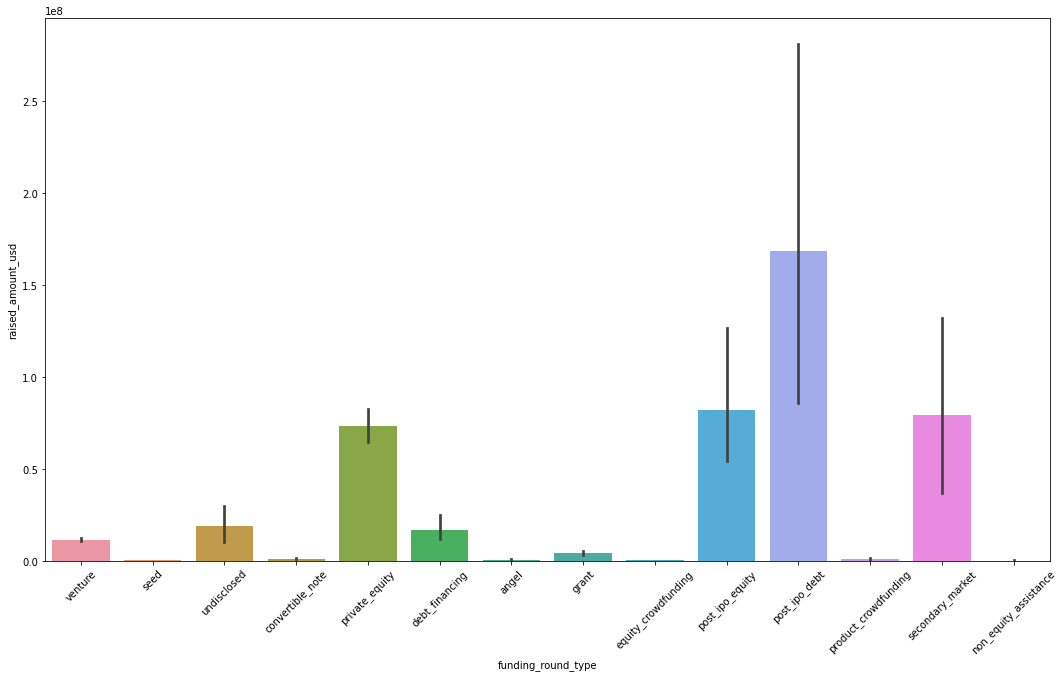

In [30]:
plt.figure(figsize=(18,10))
sns.barplot(x='funding_round_type',y='raised_amount_usd', data=master_frame, estimator=np.mean)
plt.xticks(rotation=45)
plt.show()

In [31]:
## Considering only four funding types

master_frame=master_frame[master_frame['funding_round_type'].isin(['seed','angel','venture','private_equity'])]

In [32]:
master_frame['funding_round_type'].unique()

array(['venture', 'seed', 'private_equity', 'angel'], dtype=object)

In [33]:
#Changing the value from dollar to million.

master_frame['raised_amount_usd'] = master_frame['raised_amount_usd']/1000000
master_frame.head()

,name,category_list,country_code,company_permalink,funding_round_type,raised_amount_usd
0,#fame,Media,IND,/organization/-fame,venture,10.000000
2,:Qounter,Application Platforms|Real Time|Social Network...,USA,/organization/-qounter,seed,0.700000
3,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NaN,/organization/-the-one-of-them-inc-,venture,3.406878
4,0-6.com,Curated Web,CHN,/organization/0-6-com,venture,2.000000
7,Ondine Biomedical Inc.,Biotechnology,CAN,/organization/0ndine-biomedical-inc,seed,0.043360


In [34]:
## Finding the average investment amount for each of the four funding types.

master_frame.groupby(['funding_round_type'])['raised_amount_usd'].mean()

funding_round_type
angel              0.958694
private_equity    73.308593
seed               0.719818
venture           11.748949
Name: raised_amount_usd, dtype: float64

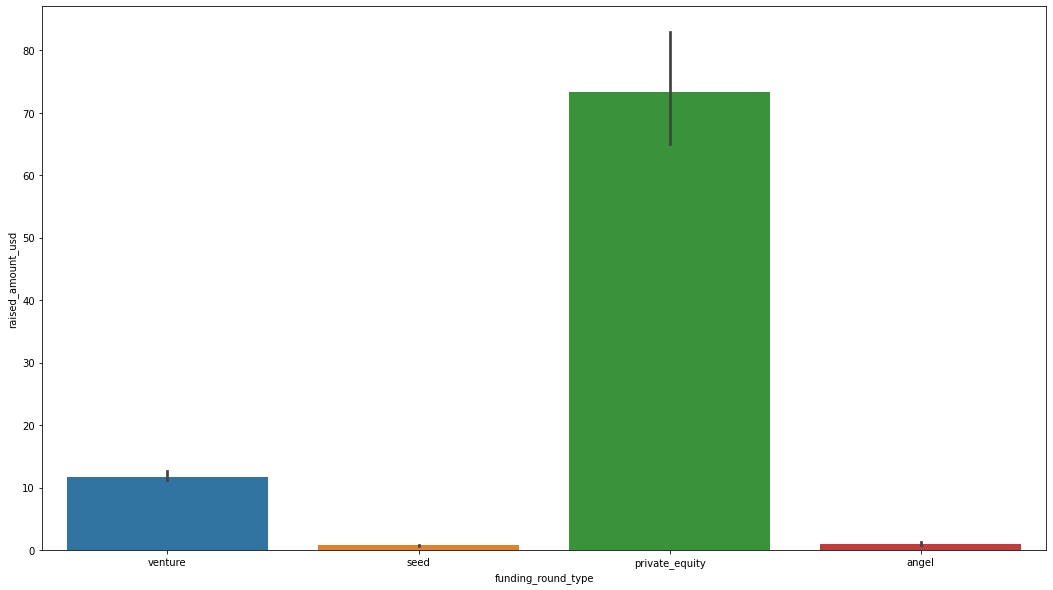

In [35]:
## Graphical representation of Venture type funding

plt.figure(figsize=(18,10))
sns.barplot(x='funding_round_type',y='raised_amount_usd', data=master_frame, estimator=np.mean)
plt.show()

### Checkpoint 2: Completed Solutions

- Average funding amount of venture type: **11.74 Million USD**
- Average funding amount of angel type: **0.9 Million USD**
- Average funding amount of seed type: **0.7 Million USD**
- Average funding amount of private equity type: **73 Million USD**
-  Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment    type is the most suitable for them? : **Venture**

<hr style="border:2px solid blue"> </hr>


<hr style="border:2px solid blue"> </hr>

### Checkpoint 3: Country Analysis

This is the second goal of analysis — **country analysis**.
 
Now that you know the type of investment suited for Spark Funds, let's narrow down the countries.
 
Spark Funds wants to invest in countries with the highest amount of funding for the chosen investment type.
This is a part of its broader strategy to invest where **most investments are occurring**.
 
1. Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)
2. For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)
 
**Identify the top three English-speaking countries in the data frame top9.**
 

In [36]:
top9 = master_frame[master_frame["funding_round_type"]=="venture"]

In [37]:
## Removing the nulls in country code

top9=top9[~top9.country_code.isnull()]

In [38]:
## Aggregating of the raised_amount_u for the 9 countries 



In [39]:
## Making top 9 countries dataframe

top9 = top9[top9['country_code'].isin(["USA","CHN","GBR","IND","CAN","FRA","ISR","DEU","JPN"])]

In [40]:
## Aggregating of the raised_amount_u for the 9 countries 

top9.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).head(9)

country_code
USA    422510.842796
CHN     39835.418773
GBR     20245.627416
IND     14391.858718
CAN      9583.332317
FRA      7259.536732
ISR      6907.514579
DEU      6346.959822
JPN      3363.676611
Name: raised_amount_usd, dtype: float64

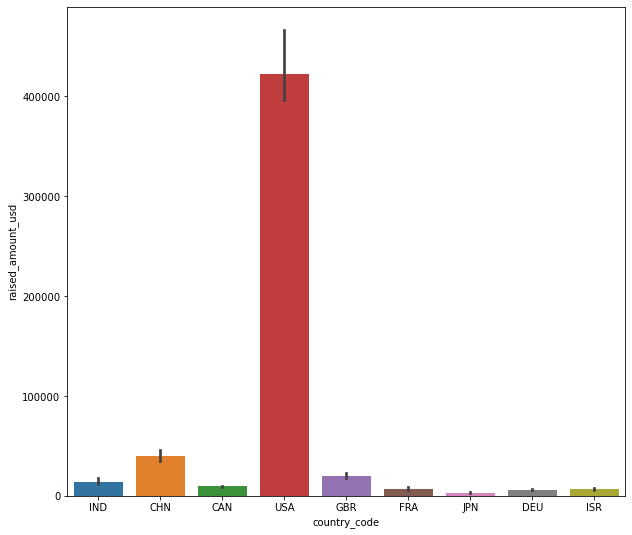

In [41]:
## Graphical representation of all companies

plt.figure(figsize=(10,9))
sns.barplot(x='country_code',y='raised_amount_usd', data=top9, estimator=np.sum)
plt.show()

In [42]:
## Creating master_frame with the top three countries

master_frame=master_frame[(master_frame['country_code'] == 'USA') | (master_frame['country_code'] == 'GBR') | (master_frame['country_code'] == 'IND')]

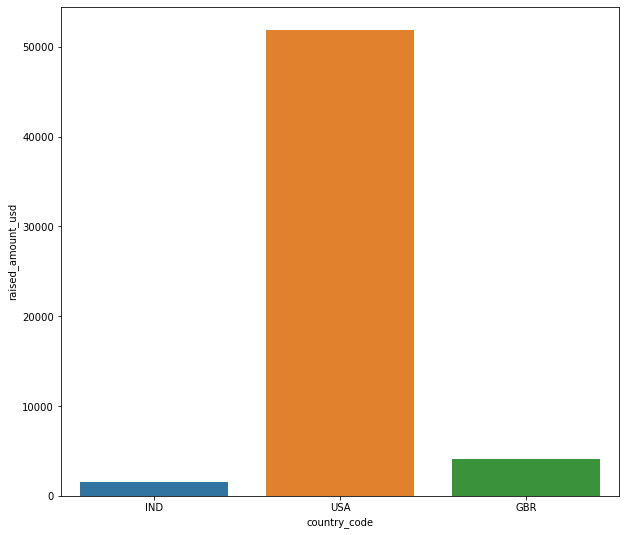

In [43]:
## Graphical representation of top three companies

plt.figure(figsize=(10,9))
sns.barplot(x='country_code',y='raised_amount_usd', data=master_frame, estimator=len)
plt.show()

###  Checkpoint 3: Completed Solutions

- Top English speaking country: **USA**
- Second English speaking country: **GBR**
- Third English speaking country: **IND**

<hr style="border:2px solid blue"> </hr>

<hr style="border:2px solid blue"> </hr>

### Checkpoint 4: Sector Analysis 1

This is the third goal of analysis — **sector analysis**.
 
When we say sector analysis, we refer to one of the **eight main sectors** (named **main_sector**) listed in the mapping file (note that ‘Other’ is one of the eight main sectors). This is to simplify the analysis by grouping the numerous category lists (named ‘category_list’) in the mapping file. For example, in the mapping file, category_lists such as ‘3D’, ‘3D Printing’, ‘3D Technology’, etc. are mapped to the main sector ‘Manufacturing’.
 
Also, for some companies, the category list is a list of multiple sub-sectors separated by a pipe (vertical bar |). For example, one of the companies’ category_list is Application Platforms|Real Time|Social Network Media.
 
1. You discuss with the CEO and come up with the **business rule** that the first string before the vertical bar will be considered the primary sector. In the example above, ‘Application Platforms’ will be considered the **primary sector**.
2. **Extract** the primary sector of each category list from the **category_list column**
Use the **mapping file** 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors)
**Expected Results:** Code for a merged data frame with each primary sector mapped to its main sector (the primary sector should be present in a separate column).
 

In [44]:
## Checking the nulls in the mapping dataframe for all attribute

mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


In [45]:
## checking the nulls percentage in mapping dataframe, for quantifying to remove the null values from attribute.

round(100*(mapping.isnull().sum()/len(mapping.index)),2)

category_list                              0.15
Automotive & Sports                        0.00
Blanks                                     0.00
Cleantech / Semiconductors                 0.00
Entertainment                              0.00
Health                                     0.00
Manufacturing                              0.00
News, Search and Messaging                 0.00
Others                                     0.00
Social, Finance, Analytics, Advertising    0.00
dtype: float64

In [46]:
## Removing the null values from category_list from mapping attribute
mapping.category_list=mapping.category_list.replace({'0':'na', '2.na':'2.0'}, regex=True)

mapping=mapping[~mapping.category_list.isnull()]
mapping.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687 entries, 1 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      687 non-null    int64 
 2   Blanks                                   687 non-null    int64 
 3   Cleantech / Semiconductors               687 non-null    int64 
 4   Entertainment                            687 non-null    int64 
 5   Health                                   687 non-null    int64 
 6   Manufacturing                            687 non-null    int64 
 7   News, Search and Messaging               687 non-null    int64 
 8   Others                                   687 non-null    int64 
 9   Social, Finance, Analytics, Advertising  687 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 59.0+ KB


In [47]:
mapping.category_list.head(688)

1                    3D
2           3D Printing
3         3D Technology
4            Accounting
5      Active Lifestyle
             ...       
683           Wholesale
684    Wine And Spirits
685            Wireless
686               Women
687        Young Adults
Name: category_list, Length: 687, dtype: object

In [48]:
## Hint: Provided by Upgrad, Also, for some companies, the category list is a list of multiple sub-sectors
## separated by a pipe (vertical bar |). 
## For example, one of the companies’ category_list is Application Platforms|Real Time|Social Network Media.

master_frame['primary_sector']=master_frame['category_list'].str.split('|', n=2,expand=True)[[0]]

In [49]:
master_frame.primary_sector

0                         Media
2         Application Platforms
9                     Analytics
10                    Analytics
11                    Analytics
                  ...          
114935               E-Commerce
114936            Biotechnology
114939                Analytics
114940                Analytics
114947     Consumer Electronics
Name: primary_sector, Length: 57517, dtype: object

In [50]:
# Using melt() functions, reshaping the dataframe

mapping1=pd.melt(mapping, id_vars=['category_list'],value_vars = ['Automotive & Sports',
 'Cleantech / Semiconductors',
 'Entertainment',
 'Health',
 'Manufacturing',
 'News, Search and Messaging',
 'Others',
 'Social, Finance, Analytics, Advertising'])
mapping1=mapping1[mapping1['value'] == 1]

In [51]:
## Dropping column value

mapping1.drop('value', axis=1 ,inplace = True)

In [52]:
mapping1

,category_list,variable
7,Adventure Travel,Automotive & Sports
13,Aerospace,Automotive & Sports
44,Auto,Automotive & Sports
45,Automated Kiosk,Automotive & Sports
46,Automotive,Automotive & Sports
...,...,...
5425,Social Recruiting,"Social, Finance, Analytics, Advertising"
5426,Social Television,"Social, Finance, Analytics, Advertising"
5427,Social Travel,"Social, Finance, Analytics, Advertising"
5438,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [53]:
## renaming attributes
mapping1.rename(columns={'category_list':'primary_sector','variable':'main_sector'},inplace = True)

In [54]:
mapping1.head()

,primary_sector,main_sector
7,Adventure Travel,Automotive & Sports
13,Aerospace,Automotive & Sports
44,Auto,Automotive & Sports
45,Automated Kiosk,Automotive & Sports
46,Automotive,Automotive & Sports


In [55]:
master_frame=master_frame.merge(mapping1, how='left', on='primary_sector')
master_frame.head()

,name,category_list,country_code,company_permalink,funding_round_type,raised_amount_usd,primary_sector,main_sector
0,#fame,Media,IND,/organization/-fame,venture,10.0,Media,Entertainment
1,:Qounter,Application Platforms|Real Time|Social Network...,USA,/organization/-qounter,seed,0.7,Application Platforms,"News, Search and Messaging"
2,H2O.ai,Analytics,USA,/organization/0xdata,seed,3.0,Analytics,"Social, Finance, Analytics, Advertising"
3,H2O.ai,Analytics,USA,/organization/0xdata,venture,20.0,Analytics,"Social, Finance, Analytics, Advertising"
4,H2O.ai,Analytics,USA,/organization/0xdata,venture,1.7,Analytics,"Social, Finance, Analytics, Advertising"


In [56]:
len(master_frame[master_frame.main_sector.isnull()])

538

In [57]:
master_frame=master_frame[~(master_frame.main_sector.isnull())]

In [58]:
len(master_frame.index)

56979

In [59]:
master_frame.shape

(56979, 8)

## Checkpoint 4: Completed

<hr style="border:2px solid blue"> </hr>



<hr style="border:2px solid blue"> </hr>

## Checkpoint 5: Sector Analysis 2

Now you have a data frame with each company’s main sector (main_sector) mapped to it. When we say sector analysis, we refer to one of the eight **main sectors**.
 
Also, you know the top three English speaking countries and the most suitable funding type for Spark Funds. Let’s call the three countries 'Country 1', 'Country 2' and 'Country 3' and the funding type 'FT'.
 
Also, the range of funding preferred by Spark Funds is **5 to 15 million USD**.
 
Now, the aim is to find out the most heavily invested main sectors in each of the three countries (for funding type FT and investments range of 5-15 M USD).

1. Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range. The three data frames should contain all the columns of the master_frame along with the main sector and the primary sector. Using the three data frames, you can calculate the **total number of investments** and the **total amount of investments** in **each main sector** for each of the three countries.
 
**Result Expected **

1. Three data frames **D1**, **D2** and **D3**
2. Table 5.1: Based on the analysis of the sectors, which main sectors and countries would you recommend Spark Funds to invest in? Present your conclusions in the presentation. The conclusions are subjective (i.e. there may be no ‘one right answer’), but it should be based on the basic strategy — invest in sectors where most investments are occurring. 
 
**Note: In the following table, all the observations refer to investments of the type FT within 5-15 M USD range.**
 

### For USA -- Sector-wise Investment Analysis

In [60]:
## Country code for USA, and raised_amount_usd is between 5 to 15

D1=master_frame[(master_frame['country_code']=='USA') & (master_frame['raised_amount_usd'] >=5) 
                & (master_frame['raised_amount_usd'] <=15)]

In [61]:
## Total number of Investments (count) for USA

D1.raised_amount_usd.count()

12487

In [62]:
## Total amount of investment (USD) for USA

D1.raised_amount_usd.sum()

111255.584667

In [63]:
## Top three Sector name (no. of investment-wise) for USA

D1.groupby('main_sector')['raised_amount_usd'].agg('count').sort_values(ascending=False).head(3)

main_sector
Others                                     3040
Social, Finance, Analytics, Advertising    2829
Cleantech / Semiconductors                 2411
Name: raised_amount_usd, dtype: int64

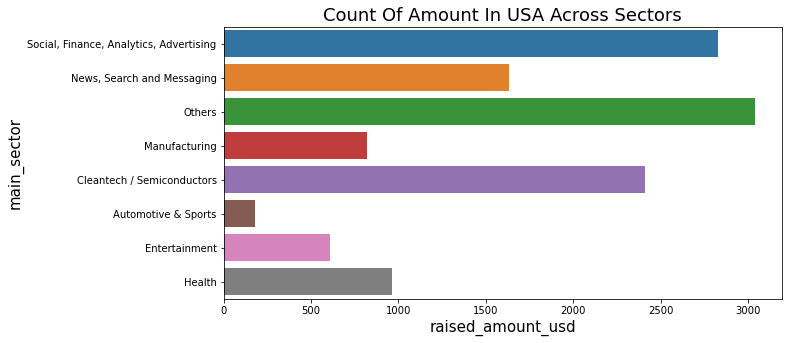

In [64]:
plt.figure(figsize=(10,5))
sns.barplot(x='raised_amount_usd',y='main_sector', data=D1, estimator=len)
plt.xlabel("raised_amount_usd", size=15)
plt.ylabel("main_sector", size=15)
plt.title("Count Of Amount In USA Across Sectors", size=18)
plt.show()            



In [65]:
## For point 3 (top sector count-wise), which company received the highest investment?

D1[D1['main_sector']=='Others'].groupby(['main_sector','company_permalink'])['raised_amount_usd'].agg('sum','count').sort_values(ascending=False).head(1)

main_sector  company_permalink        
Others       /organization/virtustream    64.3
Name: raised_amount_usd, dtype: float64

In [66]:
## For point 4 (second best sector count-wise), which company received the highest investment?

D1[D1['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['main_sector','company_permalink'])['raised_amount_usd'].agg('sum','count').sort_values(ascending=False).head(1)

main_sector                              company_permalink         
Social, Finance, Analytics, Advertising  /organization/choicestream    73.3
Name: raised_amount_usd, dtype: float64

### For GBR -- Sector-wise Investment Analysis

In [67]:
## Country code for GBR, and raised_amount_usd is between 5 to 15

D2=master_frame[(master_frame['country_code']=='GBR') & (master_frame['raised_amount_usd'] >=5) 
                & (master_frame['raised_amount_usd'] <=15)]

In [68]:
## Total number of Investments (count) for GBR

D2.raised_amount_usd.count()

654

In [69]:
## Total amount of investment (USD) for GBR

D2.raised_amount_usd.sum()

5649.104149000001

In [70]:
## Top three Sector name (no. of investment-wise) for GBR

D2.groupby('main_sector')['raised_amount_usd'].agg('count').sort_values(ascending=False).head(3)

main_sector
Others                                     153
Social, Finance, Analytics, Advertising    143
Cleantech / Semiconductors                 131
Name: raised_amount_usd, dtype: int64

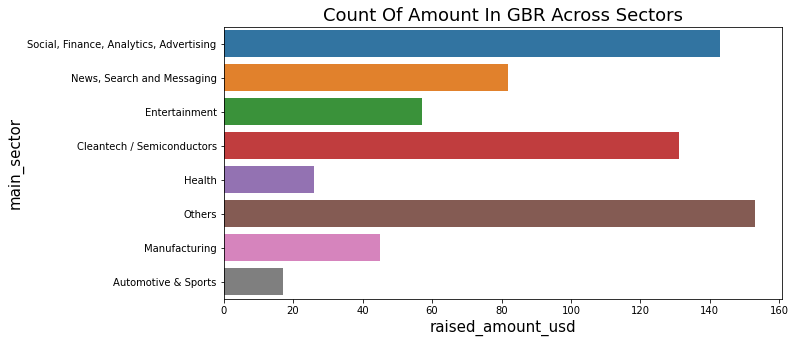

In [71]:
plt.figure(figsize=(10,5))
sns.barplot(x='raised_amount_usd',y='main_sector', data=D2, estimator=len)
plt.xlabel("raised_amount_usd", size=15)
plt.ylabel("main_sector", size=15)
plt.title("Count Of Amount In GBR Across Sectors", size=18)
plt.show()            


In [72]:
## For point 3 (top sector count-wise), which company received the highest investment?

D2[D2['main_sector']=='Others'].groupby(['main_sector','company_permalink'])['raised_amount_usd'].agg('sum').sort_values(ascending=False).head(1)

main_sector  company_permalink           
Others       /organization/electric-cloud    37.0
Name: raised_amount_usd, dtype: float64

In [73]:
## For point 4 (second best sector count-wise), which company received the highest investment?

D2[D2['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['main_sector','company_permalink'])['raised_amount_usd'].agg('sum').sort_values(ascending=False).head(1)

main_sector                              company_permalink                  
Social, Finance, Analytics, Advertising  /organization/celltick-technologies    37.5
Name: raised_amount_usd, dtype: float64

### For IND -- Sector-wise Investment Analysis

In [74]:
## Country code for IND, and raised_amount_usd is between 5 to 15

D3=master_frame[(master_frame['country_code']=='IND') & (master_frame['raised_amount_usd'] >=5) 
                & (master_frame['raised_amount_usd'] <=15)]

In [75]:
## Total number of Investments (count) for IND

D3.raised_amount_usd.count()

340

In [76]:
## Total amount of investment (USD) for IND

D3.raised_amount_usd.sum()

3038.5436019999997

In [77]:
## Top three Sector name (no. of investment-wise) for IND

D3.groupby('main_sector')['raised_amount_usd'].agg('count').sort_values(ascending=False).head(3)

main_sector
Others                                     114
Social, Finance, Analytics, Advertising     64
News, Search and Messaging                  53
Name: raised_amount_usd, dtype: int64

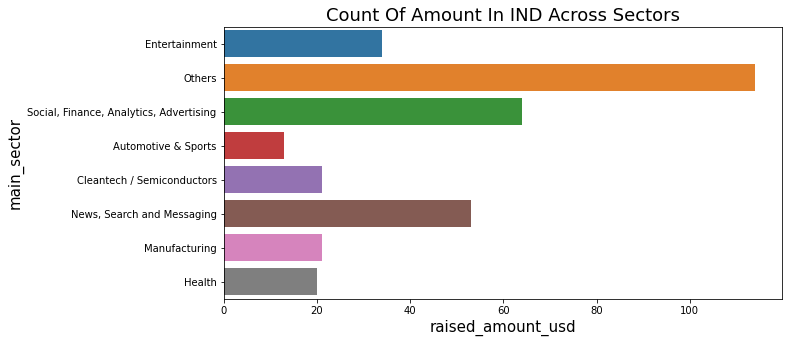

In [78]:
plt.figure(figsize=(10,5))
sns.barplot(x='raised_amount_usd',y='main_sector', data=D3, estimator=len)
plt.xlabel("raised_amount_usd", size=15)
plt.ylabel("main_sector", size=15)
plt.title("Count Of Amount In IND Across Sectors", size=18)
plt.show()            



In [79]:
## For point 3 (top sector count-wise), which company received the highest investment?

D3[D3['main_sector']=='Others'].groupby(['main_sector','company_permalink'])['raised_amount_usd'].agg('sum').sort_values(ascending=False).head(1)

main_sector  company_permalink         
Others       /organization/firstcry-com    39.0
Name: raised_amount_usd, dtype: float64

In [80]:
## For point 4 (second best sector count-wise), which company received the highest investment?

D3[D3['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['main_sector','company_permalink'])['raised_amount_usd'].agg('sum').sort_values(ascending=False).head(1)

main_sector                              company_permalink            
Social, Finance, Analytics, Advertising  /organization/manthan-systems    50.7
Name: raised_amount_usd, dtype: float64

## Checkpoint 5: Sector Analysis 2: Completed

<hr style="border:2px solid blue"> </hr>

<hr style="border:2px solid blue"> </hr>

## Checkpoint 6: Plots
As a final step, you have to present your findings to the CEO of Spark Funds. Specifically, she wants to see the following plots:
 
1. A plot showing the **representative amount of investment** in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.   
2. A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.                                               

3. A plot showing the number of investments in the **top 3 sectors** of the **top 3 countries** on one chart (for the chosen investment type FT). This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.
 
**Expected Result:** The three plots.

#### Scenario 1: A plot showing the representative amount of investment in each funding type. This chart should make it clear  that a certain funding type (FT) is best suited for Spark Funds.



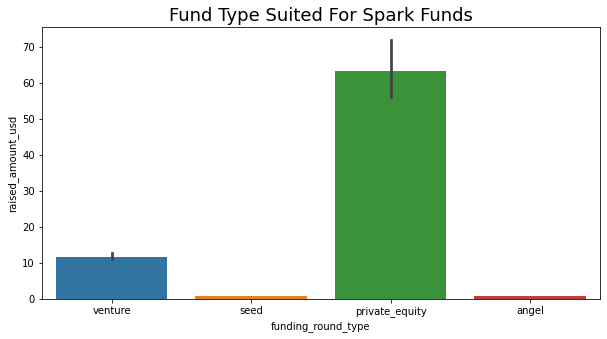

In [81]:
plt.figure(figsize=(10,5))
plt1 = sns.barplot(x="funding_round_type", y="raised_amount_usd", data=master_frame)
plt1.set_title('Fund Type Suited For Spark Funds', fontsize=18)
plt.show()

####  Scenario 2: A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

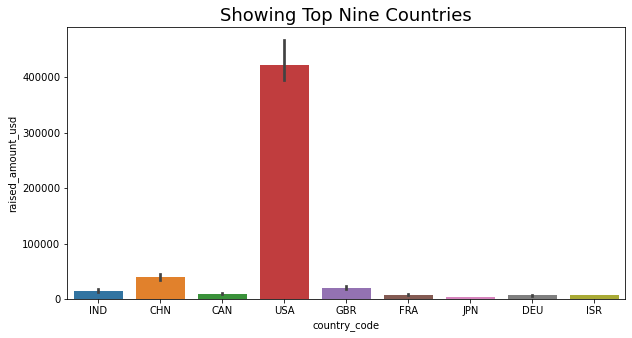

In [82]:
plt.figure(figsize=(10,5))
plt2=sns.barplot(x='country_code',y='raised_amount_usd', data=top9, estimator=np.sum)
plt2.set_title('Showing Top Nine Countries', fontsize=18)
plt.show()

#### Scenario 3: A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.


In [83]:
##Concatenating all the dataframes with the required top 3 sectors

integrated_dataframe=pd.concat([D1[D1['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])],
                                D2[D2['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])],
                                D3[D3['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','News, Search and Messaging'])]])

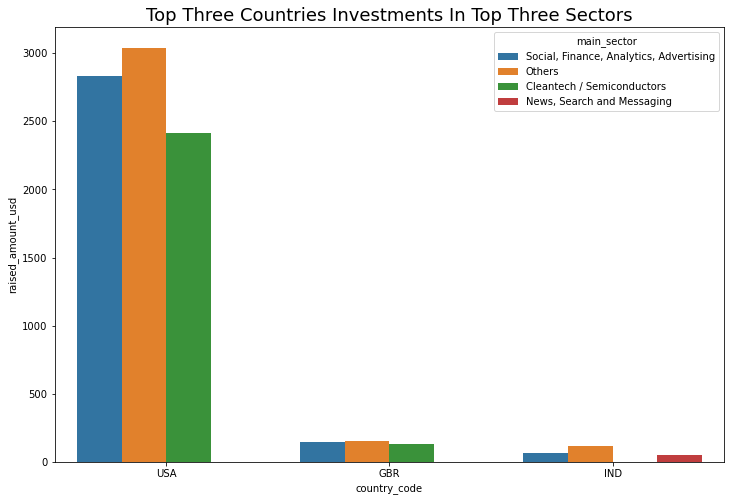

In [84]:
plt.figure(figsize=(12,8))
plt2=sns.barplot(x='country_code',y='raised_amount_usd', hue='main_sector',data=integrated_dataframe, estimator=lambda x:len(x))
plt2.set_title('Top Three Countries Investments In Top Three Sectors', fontsize=18)
plt.show()